# Machine Learning Summative Assessment

In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from IPython.display import Image

## The MNIST dataset

In [25]:
mnist_data = datasets.fetch_mldata('MNIST original', data_home = 'datasets/')

#inputs
X = pd.DataFrame(mnist_data.data)

#outputs
y = pd.DataFrame(mnist_data.target)

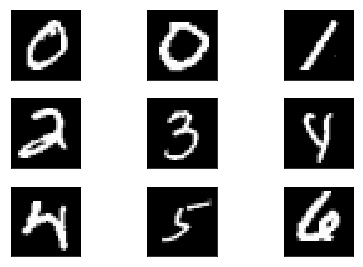

In [26]:
fig = plt.figure()

for i in range(9):
    pixels = np.array(X.iloc[i*5000]) #random digit index
    pixels = pixels.reshape((28, 28))
    pixels = np.array(pixels, dtype='uint8')
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(pixels, cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])

plt.savefig('img/digits.png')

## Unsupervised learning


In [31]:
#standardize dataset
X_standardized = preprocessing.scale(X)

#split into test/train
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.33, random_state=42) #fix seed for reproducibility

In [32]:
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

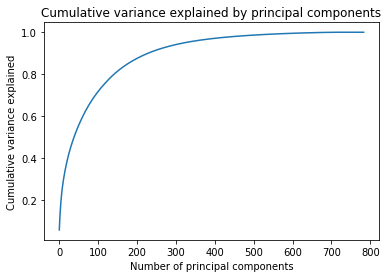

In [33]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('Cumulative variance explained by principal components')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative variance explained')
plt.show()

In [34]:
pca95 = PCA(0.95)
df_pca95 = pca95.fit_transform(X_train)

In [35]:
print('95 percent of the variance is explained by %s of the principal components. The remaining %s components only explain 5 percent of the variance.'%(df_pca95.shape[1], X_train.shape[1]-df_pca95.shape[1]))

95 percent of the variance is explained by 324 of the principal components. The remaining 460 components only explain 5 percent of the variance.


In [87]:
pca2 = PCA(n_components=2)
df_pca2 = pca2.fit_transform(X_train)
display(pca2.components_)
print(pca2.explained_variance_)

array([[ 1.83659746e-18,  1.60245554e-20, -7.24038634e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 7.56923237e-18,  4.98738371e-18,  9.62765583e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

[40.84501703 28.98283039]


/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


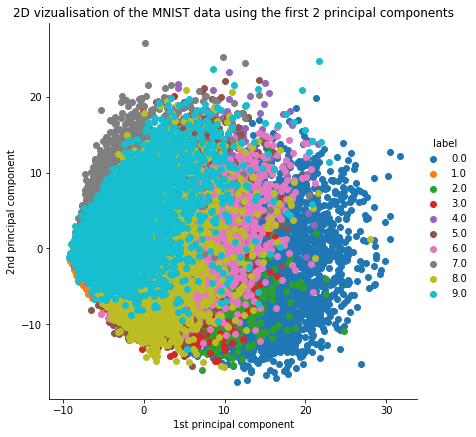

In [111]:
import seaborn as sn

# attaching the label for each 2-d data point 
pca2_data = np.concatenate((np.array(df_pca2), np.array(y_train)), axis = 1)

# creating a new data fram which help us in plotting the result data
pca_df = pd.DataFrame(data=pca2_data, columns=("1st principal component", "2nd principal component", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st principal component', '2nd principal component').add_legend()
plt.title('2D vizualisation of the MNIST data using the first 2 principal components')
plt.show()

## Support vector machines

### Building SVCs and SVMs.

In [15]:
#load in results
costs = [0.001,0.01,0.1,1,10,100]
scores_linear = np.load('scores_linear.npy')
print('Validation accuracy:',scores_linear)

Validation accuracy: [0.93656704 0.93869919 0.92746271 0.9166309  0.91115066]


Let's plot the different accuracy scores of our SVC depending on the value of the cost parameter:

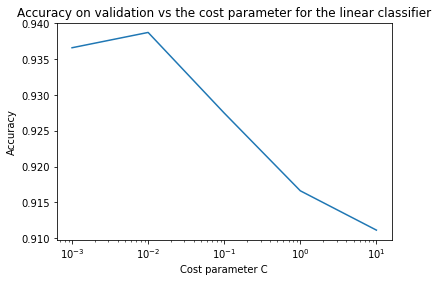

In [16]:
plt.plot(costs, scores_linear)
plt.ylabel('Accuracy')
plt.xlabel('Cost parameter C')
plt.xscale('log')
plt.title('Accuracy on validation vs the cost parameter for the linear classifier')
plt.show()

The best validation accuracy is 0.939 for a cost of 0.01. We can build a model using _C = 0.01_ and test the model performance on our test set:

In [11]:
from sklearn import metrics
from sklearn.svm import SVC

linear_model = SVC(C= 0.01, kernel='linear')
linear_model.fit(X_train,y_train)
print('Accuracy on test set:', linear_model.score(X_test,y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on test set: 0.9422510822510822


In [12]:
from sklearn.metrics import confusion_matrix, classification_report

linear_pred = linear_model.predict(X_test)
print(confusion_matrix(linear_pred, y_test))
print(classification_report(linear_pred, y_test))

[[2174    0   10    2    3   13   19    5    8    5]
 [   0 2504   25    9    3   13    1    8   29    9]
 [  10   13 2174   43   17   14   27   21   20   10]
 [   3    3   25 2158    0   73    1   19   44   25]
 [   7    2   20    4 2154   20   10   26   13   62]
 [   7    1   12   59    2 1960   31    4   38   12]
 [  12    1    9    0    8   24 2225    1    8    0]
 [   1    5   12    8   11    2    2 2286    7   66]
 [  13   10   30   29    6   38    7    4 2092   18]
 [   2    4    4    7   49   10    0   52   14 2039]]
             precision    recall  f1-score   support

        0.0       0.98      0.97      0.97      2239
        1.0       0.98      0.96      0.97      2601
        2.0       0.94      0.93      0.93      2349
        3.0       0.93      0.92      0.92      2351
        4.0       0.96      0.93      0.94      2318
        5.0       0.90      0.92      0.91      2126
        6.0       0.96      0.97      0.97      2288
        7.0       0.94      0.95      0.95  

**Comparing models**

In [ ]:
#RUN THIS ON SERVER
#run SVM_multi_quad.py on server
#SVM_multi_quad.py file

import multiprocessing
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


def svc_cost(cost):
    model_svc = SVC(C= cost, kernel='poly', degree=2)
    new_score = cross_val_score(model_svc, X_train, y_train, cv=5)
    return new_score.mean()

def svc_pool(c):
    scores = list()
    
    with multiprocessing.Pool() as pool:
        results=pool.map(svc_cost, c, chunksize=1)
    
    for r in results:
        scores.append(r)
    
    return scores

mnist_data = datasets.fetch_mldata('MNIST original', data_home = 'datasets/')

X = pd.DataFrame(mnist_data.data)
y = pd.DataFrame(mnist_data.target)

X_standardized = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.33, random_state=42) #fix seed for reproducibility
y_train = np.array(y_train).ravel()

costs = [0.001,0.01,0.1,1,10,100]

scores_quad = svc_pool(costs)

np.save('scores_quad',scores_quad)

In [ ]:
#RUN THIS ON SERVER
#run SVM_rbf_grid.py on server
#SVM_rbf_grid.py file

import multiprocessing
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

mnist_data = datasets.fetch_mldata('MNIST original', data_home = 'datasets/')

X = pd.DataFrame(mnist_data.data)
y = pd.DataFrame(mnist_data.target)

X_normalised = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_normalised, y, test_size=0.33, random_state=42) #fix seed for reproducibility
y_train = np.array(y_train).ravel()


model_rbf = SVC(kernel="rbf", probability = True, cache_size = 600)

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
logGamma = [-4,-3,-2,-1,0] 
param_dist = {'C': [0.001,0.01,0.1,1,10,100], 'gamma': [10**g for g in logGamma], 'kernel': ['rbf']}

# run grid search
grid_search = GridSearchCV(model_rbf, param_grid=param_dist, cv=2, n_jobs = -1)


grid_search.fit(X_train, y_train)
grid_search.cv_results_

np.save('rbf_results',grid_search.cv_results_)

In [5]:
#let's load the data back in
scores_quad = np.load('scores_quad.npy')
rbf_results = np.load('rbf_results.npy')

scores_rbf = dict(enumerate(rbf_results.flatten(), 1))
scores_rbf = scores_rbf[1]

print('Best quadratic accuracy:', scores_quad.max(),'cost:',costs[scores_quad.argmax()])
print('Best RBF accuracy:', scores_rbf['mean_test_score'].max())

Best quadratic accuracy: 0.9728783403499662 cost: 10
Best RBF accuracy: 0.9609808102345416


In [61]:
#best model seems to be quadratic kernel with cost 10
#report best model performance
best_model = SVC(C= 10, kernel='poly', degree=2)
best_model.fit(X_train,y_train)
print('Accuracy on test set:', best_model.score(X_test,y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on test set: 0.9764069264069264


In [63]:
pred = best_model.predict(X_test)

In [65]:
print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

[[2195    0    6    1    2    4    9    4    6    5]
 [   1 2519    6    0    2    1    1    6   10    3]
 [   6    9 2271   18   11    6    2    7   10    7]
 [   8    4    8 2254    3   19    4    4   12   16]
 [   1    2    3    1 2210    4    5    7   10   17]
 [   4    1    2   17    2 2100   11    1   13   10]
 [   7    1    0    3    5   10 2279    0    3    0]
 [   0    4    9    6    5    3    1 2370    4   20]
 [   4    0   11   15    0   12   11    9 2200   11]
 [   3    3    5    4   13    8    0   18    5 2157]]
             precision    recall  f1-score   support

        0.0       0.98      0.98      0.98      2232
        1.0       0.99      0.99      0.99      2549
        2.0       0.98      0.97      0.97      2347
        3.0       0.97      0.97      0.97      2332
        4.0       0.98      0.98      0.98      2260
        5.0       0.97      0.97      0.97      2161
        6.0       0.98      0.99      0.98      2308
        7.0       0.98      0.98      0.98  

## Neural Networks

In [14]:
class NeuralNet(): 
    def __init__(self, X, y, hidden_size, output_size):
        '''
        Initializing my Neural Network.
        X: inputs to train on
        y: outputs of training data
        hidden_size: number of neurons in hidden layer (only 1 hidden layer)
        output_size: number of neurons in final output layer
        '''
        
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        #stochastic gradient descent: we shuffle the data so we don't have the same digits trained on
        r = np.random.RandomState(seed=33).permutation(X.shape[1])
        self.X = X[:,r]
        self.y = y[:,r]

        #input layer to hidden layer
        self.biases1 = np.zeros((hidden_size, 1))
        self.weights1 = np.random.randn(self.X.shape[0], hidden_size)
        
        #hidden layer to output layer
        self.biases2 = np.zeros((output_size, 1))
        self.weights2 = np.random.randn(hidden_size, output_size)
        
        #cost
        self.cost = []
        
        
    def sigmoid(self, z):
        '''
        activation function (sigmoid)
        z: weighted inputs
        '''
        sig = 1/(1 + np.exp(-z))
        return sig
    
    def sigmoidprime(self, z): 
        '''
        derivative of activation function (sigmoid)
        z: weighted inputs
        '''
        sig_prime = (self.sigmoid(z) * (1 - self.sigmoid(z)))
        return sig_prime
    
    #note that this is the generalisation of the cross-entropy function to multi-class problem (citation?)
    def loss_function(self, y_sgd): 
        '''
        loss function (cross-entropy)
        y_sgd: output fed in from SGD
        '''
        loss = - np.sum(np.multiply(y_sgd, np.log(self.y_hat))) #*(1/self.m) [not needed anymore as we are doing SGD]
        return loss
    
    def softmax(self, z): 
        '''
        softmax function for the final layer
        z: weighted inputs
        '''
        sm = np.exp(z)/np.sum(np.exp(z), axis = 0)
        return sm
    
    def feedforward(self,X_sgd):     
        '''
        feedforward algorithm, returns activation and weighted inputs of each layer
        X_sgd: input fed in from SGD
        '''
        z1 = np.matmul(self.weights1.T,X_sgd) + self.biases1
        a1 = self.sigmoid(z1)
        
        z2 = np.matmul(self.weights2.T, a1) + self.biases2
        a2 = self.softmax(z2)

        a_z = {'a1': a1, 'a2': a2, 'z1': z1, 'z2': z2}

        return a_z
    
    def backpropagation(self, X_sgd, y_sgd): 
        '''
        backpropagation algorithm: returns the loss but also updates the weights and biases accordingly
        X_sgd: input fed in from SGD
        y_sgd: output fed in from SGD
        '''
#         m = y_sgd.shape[0] [not needed anymore as we are doing SGD]
        
        W1 = self.weights1
        W2 = self.weights2
        b1 = self.biases1
        b2 = self.biases2
        
        #calculate loss
        a_z = self.feedforward(X_sgd)
        self.y_hat = a_z['a2']
        loss = self.loss_function(y_sgd)

        #uses the already simplified derivatives at each step (see previous answer)
        dZ2 = self.y_hat-y_sgd
        dW2 = np.matmul(dZ2, a_z['a1'].T) #*(1./m) [not needed anymore as we are doing SGD]
        db2 = np.sum(dZ2, axis=1, keepdims=True) #*(1./m) [not needed anymore as we are doing SGD]

        dA1 = np.matmul(W2, dZ2)
        dZ1 = dA1 * self.sigmoidprime(a_z['z1'])
        dW1 = np.matmul(dZ1, X_sgd.T) #*(1./m) [not needed anymore as we are doing SGD]
        db1 = np.sum(dZ1, axis=1, keepdims=True) #*(1./m) [not needed anymore as we are doing SGD]
        
        #updates weights and biases
        self.weights2 = W2 - self.lr * dW2.T
        self.biases2 = b2 - self.lr* db2
        self.weights1 = W1 - self.lr * dW1.T
        self.biases1 = b1 - self.lr* db1
        
        return loss
        
    def fit(self, epochs = 10, lr = 1):
        '''
        trains the models using SGD
        epochs: number of epochs. default is 10
        lr: learning rate (default 1)
        '''
        self.lr = lr
        for e in range(epochs):
            for i in range(self.X.shape[1]):
            #perform backpropagation SGD
                cost_epoch = self.backpropagation(np.asarray([self.X[:,i]]).T, np.asarray([self.y[:,i]]).T)
            print('Epoch ', e, 'cost', cost_epoch)
            self.cost_tracker(cost_epoch)
        return cost_epoch
                
    def predict(self, X_test, y_test):
        '''
        predicts outputs based on model trained and test set
        X_test: test input data
        y_test: test output data
        '''
        
        #use feedforward function to get predictions
        a_z = self.feedforward(X_test)

        pred_labels = np.argmax(a_z['a2'], axis=0)
        true_labels = np.argmax(y_test, axis=0)

        return pred_labels, true_labels

    def cost_tracker(self,l):
        '''
        track the loss over time
        l: loss to append to the cost
        '''
        self.cost.append(l)

The inputs are normalised in order to have comparable scales. In addition, the labels are one-hot encoded as it is a multi-class problem. 

In [15]:
#divide by number of pixels
X_normalised = np.asarray(X/255)

#one-hot encoding
y_dummies = pd.DataFrame(y).astype("str")
y_dummies = pd.get_dummies(y_dummies)
y_dummies = np.asarray(y_dummies)

X_train, X_test, y_train, y_test = train_test_split(X_normalised, y_dummies, test_size=0.33, random_state=42) #fix seed for reproducibility

In [ ]:
#Similarly to SVM, we create the same training and test datasets but also add a validation set in order to optimise the learning rate.
#Split training data into training and cross validation data
mask = np.random.RandomState(seed=45).rand(len(X_train)) < 0.8
X_cv = X_train[~mask]
y_cv = y_train[~mask]
X_train = X_train[mask]
y_train = y_train[mask]
X_cv = X_cv.T
y_cv = y_cv.T

In [16]:
#transpose it for NN
X_train = X_train.T
X_test = X_test.T

y_train = y_train.T
y_test = y_test.T

In [19]:
mnist_nn = NeuralNet(X_train, y_train, hidden_size = 100, output_size = 10) 

#optimising learning rate
mnist_nn.fit(epochs = 10, lr = 0.1)
    
#     c_val = mnist_nn.val(X_val = X_cv, y_val = y_cv)
#     costs_val.append(c_val)
#     print(learning_rate[l], c_train)# c_val

Epoch  0 cost 0.006544680634129401
Epoch  1 cost 0.004949017101555892
Epoch  2 cost 0.008241094521961152
Epoch  3 cost 0.001772693369435508
Epoch  4 cost 0.00231961157088283
Epoch  5 cost 0.0021467520912431958
Epoch  6 cost 0.00014630778107690927
Epoch  7 cost 6.820231696622643e-05
Epoch  8 cost 7.142105867019329e-05
Epoch  9 cost 0.0002506670838975575


0.0002506670838975575

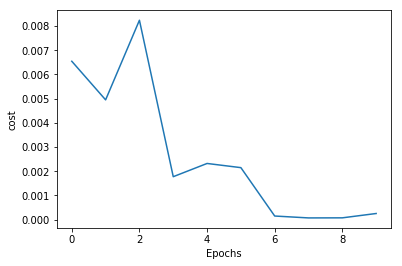

In [20]:
# Let's plot the costs for each epoch
plt.plot(range(len(mnist_nn.cost)), mnist_nn.cost)
# plt.plot(learning_rate, costs_val)
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.show()

In [21]:
pred_val, true_val = mnist_nn.predict(X_test, y_test)

In [22]:
classification = (pred_val == true_val)
accuracy = np.unique(classification, return_counts=True)
print(accuracy[1][1]/np.sum(accuracy))

0.9542876931734557


In [24]:
print(confusion_matrix(pred_val, true_val))
print(classification_report(pred_val, true_val))

[[2167    0   13    1    3    6   28    4    9    9]
 [   2 2508   31    3    0    6    1    7   23    4]
 [   9    9 2188   17   15    3   10   15   20    1]
 [   6    5   33 2199    1   18    1    9   62   19]
 [   3    3    6    1 2160    4   19    5   11   34]
 [  24    4    5   67    2 2098   45    8   46   37]
 [   5    1    5    1    5    9 2207    1    8    0]
 [   3    5   27   11   17    7    2 2346    9   24]
 [   6    5    8   10    2    4   10    4 2061    7]
 [   4    3    5    9   48   12    0   27   24 2111]]
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      2240
          1       0.99      0.97      0.98      2585
          2       0.94      0.96      0.95      2287
          3       0.95      0.93      0.94      2353
          4       0.96      0.96      0.96      2246
          5       0.97      0.90      0.93      2336
          6       0.95      0.98      0.97      2242
          7       0.97      0.96      0.96  

In [6]:
# one-hot encoding using keras' numpy related utilities
# import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

y_train_dummy = keras.utils.to_categorical(y_train, num_classes=10)
y_test_dummy = keras.utils.to_categorical(y_test, num_classes=10)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [29]:
model = Sequential() #there is also convolutional

#hidden layer 1
model.add(Dense(units=1200, kernel_initializer='uniform', activation='relu',input_shape=(X_train.shape[1],)))
#randomly drops out x% of neurons during forward pass
#for more doc: https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
model.add(Dropout(0.3)) #should be between 0.2 to 0.5

#hidden layer 2
model.add(Dense(units=1200, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3)) #should be between 0.2 to 0.5

#final output layer
model.add(Dense(units=10, kernel_initializer='uniform', activation='softmax'))

#Compile the model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=["accuracy"])

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1200)              942000    
_________________________________________________________________
dropout_7 (Dropout)          (None, 1200)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1200)              1441200   
_________________________________________________________________
dropout_8 (Dropout)          (None, 1200)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                12010     
Total params: 2,395,210
Trainable params: 2,395,210
Non-trainable params: 0
_________________________________________________________________


In [31]:
Early_Stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

model_tensorflow = model.fit(X_train, y_train_dummy, epochs=30, batch_size=128, validation_split = 0.2, callbacks=[Early_Stop])


Train on 37520 samples, validate on 9380 samples
Epoch 1/30
37520/37520 [==============================] - 40s - loss: 0.0155 - acc: 0.9950 - val_loss: 0.1219 - val_acc: 0.9788
Epoch 2/30
37520/37520 [==============================] - 39s - loss: 0.0203 - acc: 0.9943 - val_loss: 0.1192 - val_acc: 0.9787
Epoch 3/30
37520/37520 [==============================] - 41s - loss: 0.0189 - acc: 0.9952 - val_loss: 0.1289 - val_acc: 0.9786
Epoch 4/30
37520/37520 [==============================] - 46s - loss: 0.0184 - acc: 0.9949 - val_loss: 0.1175 - val_acc: 0.9811
Epoch 5/30
37520/37520 [==============================] - 38s - loss: 0.0192 - acc: 0.9948 - val_loss: 0.1236 - val_acc: 0.9775
Epoch 6/30
37520/37520 [==============================] - 38s - loss: 0.0165 - acc: 0.9950 - val_loss: 0.1129 - val_acc: 0.9812
Epoch 7/30
37520/37520 [==============================] - 40s - loss: 0.0130 - acc: 0.9962 - val_loss: 0.1207 - val_acc: 0.9787
Epoch 8/30
37520/37520 [==============================]

In [32]:
model.save('keras_model.h5')

In [34]:
model_tensorflow.model.evaluate(X_test, y_test_dummy)

23072/23100 [============================>.] - ETA: 0s

[0.11437468145333618, 0.9817316017316017]

## Data Science Challenge. [5 points] 

_Joint Group Work by candidate numbers: 1029141, 1028910, 1032494_

In [1]:
# Importing relevant packages
from keras.datasets import mnist
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
K.set_image_dim_ordering('th')

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# load MNIST dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11247616/11490434 [============================>.] - ETA: 0s

In [4]:
# fix a random seed for reproducibility
seed = 7
np.random.seed(seed)

In [5]:
# Reshape the data
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [6]:
#### Still needed?? ####

# second dimension is 1, as we only have greyscale and no colors, thus we don't need rgb description for each pixel
np.shape(X_train)
#images x greyscale x 28pixel x 28 pixel

(60000, 1, 28, 28)

In [7]:
# normalize the pixel values to the range 0 and 1 by dividing each value by the maximum of 255
# normalize inputs from 0-255 to 0-1
# No need to renormalise
# X_train = X_train / 255
# X_test = X_test / 255

# one hot encode outputs

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


#### Still needed?? ####
# number of classes
num_classes = y_test.shape[1]

In [9]:
# create model
model = Sequential()
    
model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
    
model.add(Flatten())
model.add(Dense(200, activation='relu'))
    
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model_tensorflow = model.fit(x_train_cnn, y_train_onehot, epochs=10, batch_size=200, validation_split = 0.2, verbose  = 1)

# Save model
model.model.save('model_convolution2.h5')

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 222s - loss: 0.2276 - acc: 0.9349 - val_loss: 0.0786 - val_acc: 0.9759
Epoch 2/10
60000/60000 [==============================] - 220s - loss: 0.0701 - acc: 0.9796 - val_loss: 0.0469 - val_acc: 0.9848
Epoch 3/10
60000/60000 [==============================] - 220s - loss: 0.0505 - acc: 0.9843 - val_loss: 0.0379 - val_acc: 0.9875
Epoch 4/10
60000/60000 [==============================] - 215s - loss: 0.0384 - acc: 0.9880 - val_loss: 0.0376 - val_acc: 0.9875
Epoch 5/10
60000/60000 [==============================] - 215s - loss: 0.0302 - acc: 0.9909 - val_loss: 0.0344 - val_acc: 0.9886
Epoch 6/10
60000/60000 [==============================] - 217s - loss: 0.0259 - acc: 0.9917 - val_loss: 0.0332 - val_acc: 0.9886
Epoch 7/10
60000/60000 [==============================] - 222s - loss: 0.0203 - acc: 0.9934 - val_loss: 0.0359 - val_acc: 0.9880
Epoch 8/10
60000/60000 [=======================

In [10]:
# Get accuracy or other parameters from saved model

from keras.models import load_model

model = load_model('model_convolution2.h5')

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 1.06%
